Develop a classification model using Decision Tree Algorithm

<style>
table {
    font_size: 18px;
    } 
</style>       

In [2]:
# Supress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [1]:
#Libraries
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import jupyterthemes as jt

In [6]:
#Downloading the Data
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
#Size of data
my_data.shape

(200, 6)

In [8]:
#Pre-processing
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [9]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]   #Feature Matrix(data of my_data)


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
y = my_data["Drug"]
y[0:5]     #Response vector(target)

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
#Setting up the Decision Tree
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [13]:
print('Shape of X training set{}'.format(X_trainset.shape),'&','Size of y training set{}'.format(y_trainset.shape))
print('Shape of X testing set{}'.format(X_testset.shape),'&',' Size of y testing set{}'.format(y_testset.shape))

Shape of X training set(140, 5) & Size of y training set(140,)
Shape of X testing set(60, 5) &  Size of y testing set(60,)


In [19]:
#Modeling
drugTree = DecisionTreeClassifier(criterion="entropy",max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
#Prediction
predTree =drugTree.predict(X_testset)
print(predTree [0:5])
print(y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [23]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))


DecisionTree's Accuracy:  0.9833333333333333


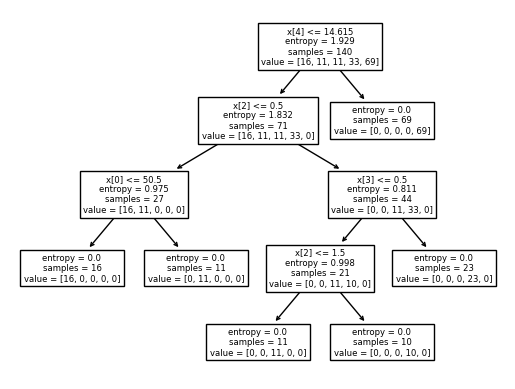

In [24]:
#Visualization
tree.plot_tree(drugTree)
plt.show()

In [33]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg


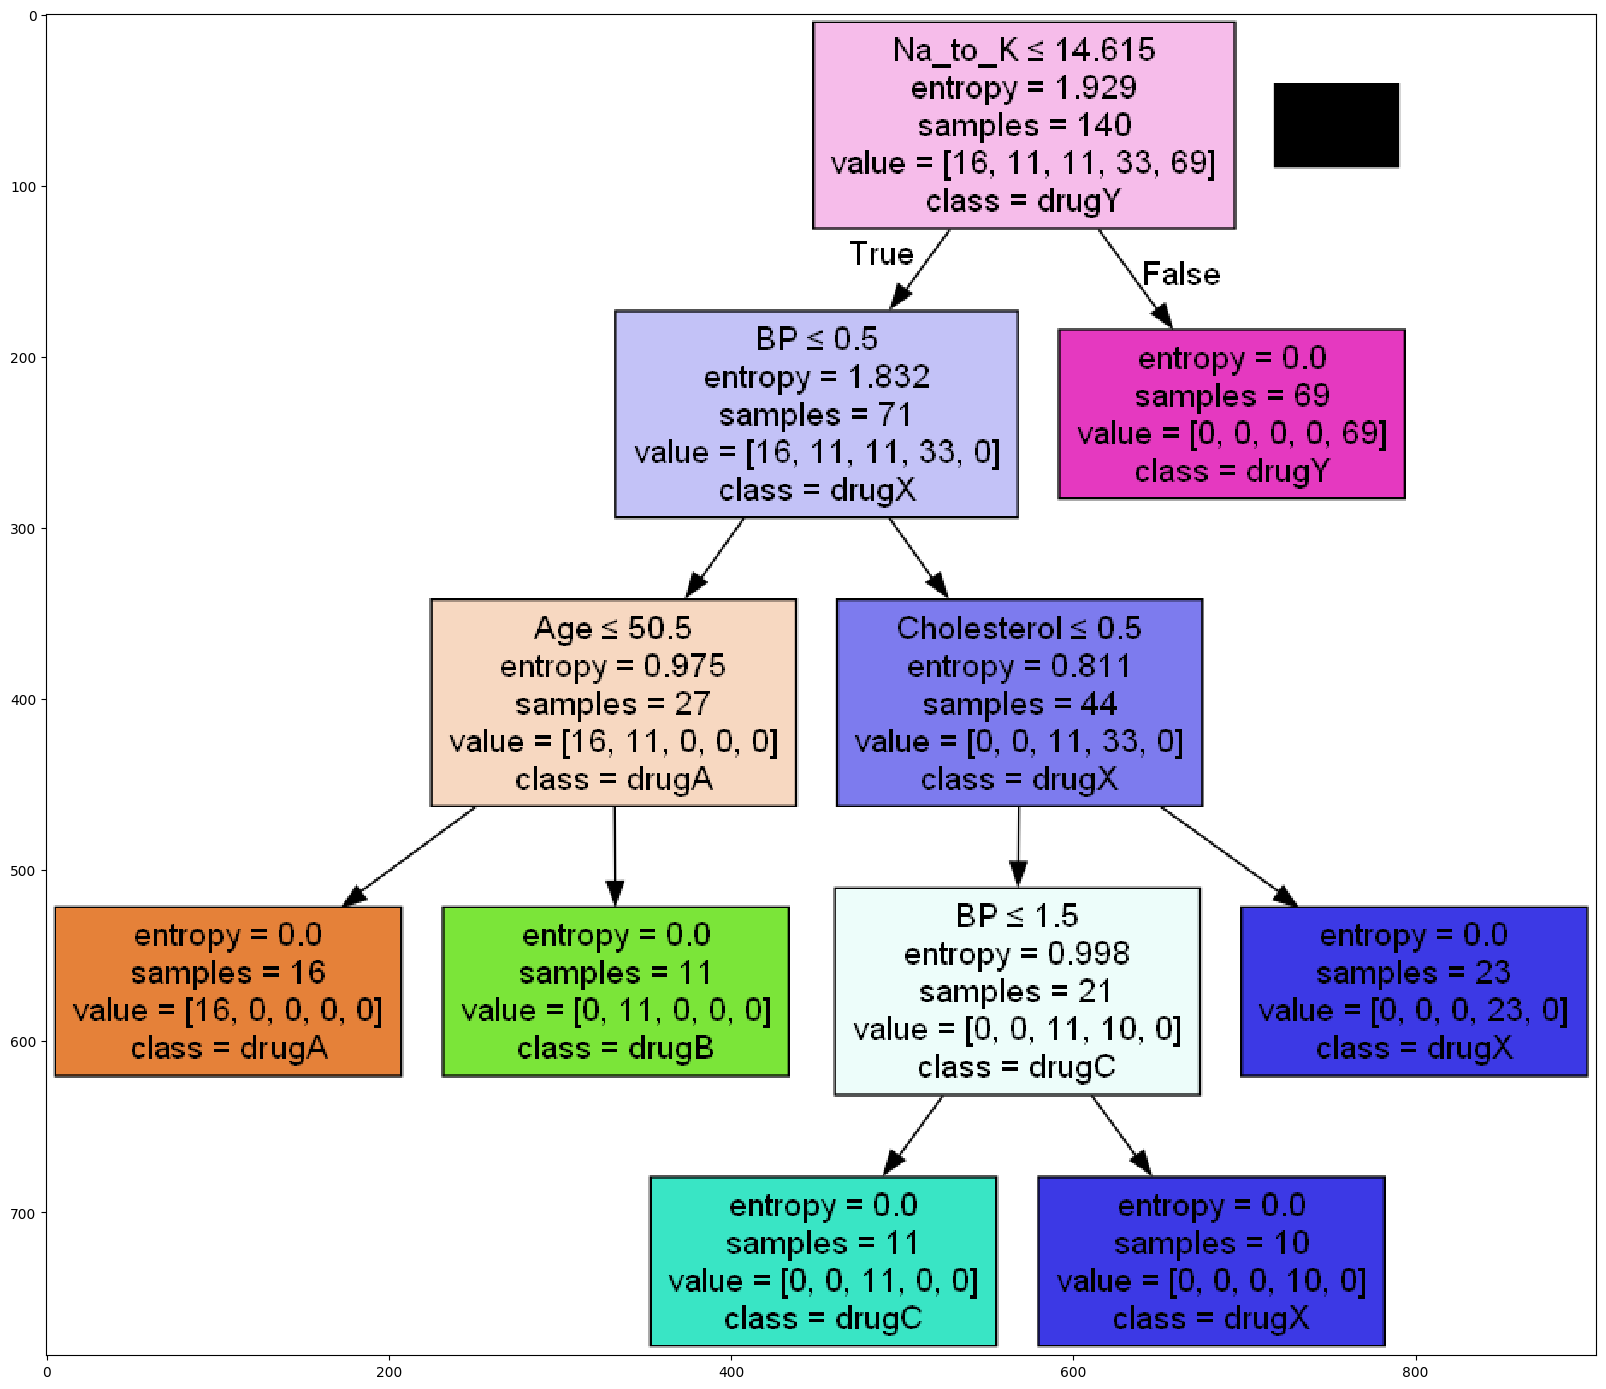

In [35]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 40))
plt.imshow(img,interpolation='nearest')